## Write a Data Science Blog Post
### War for talent! What companies need to do to  attract talent within software engineering. 

With the help of the Stack Overflow Developer Survey from 2019 I want to answer the question, what companies need to do to attract talent within software engineering.
For the analysis of the data set I will follwo the CRISP-DM Process (Cross Industry Process for Data Mining)

### 1. Business Understanding

With the help of the Stack Overflow Developer Survey from 2019 I want to answer the question, what companies need to do to attract talent within software engineering.

War for talent! How companies need attract talent! 
When I worked in start up. The most challenages we face was to find software..
Base on study, there will be a shortage of software.. (50.00 by 2020)
In this ongogin war for talent, what must a company do to attract talent? 
How does programmer think? Whats important to them? Non it hr , manager, decision maker must undertand these people in order to attract them? Audience are HR and recruiting!

How must a company be to attract good programmer? 
What correlates most with the satisfied emlpoyess?
Do they program in their freetime? Space for own projects at work?
What size do the companies with satisfied emplpyees ah?
How big of a role plays the salary?
Working remote, more happy?

What are the most important factors for jobs satisfaction, and then have a closer look at them

Call for action for HR and companies!




### 2. Data Understanding

In [10]:
# importing the neccessary libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data -  2019 Stack Overflow Developer Survey.

The data set is the full, cleaned results of the **2019 Stack Overflow Developer Survey**. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are two CSV files:


1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

In [9]:
# loading the dataset and the survey schema to the notebook
survey_schmema = pd.read_csv('survey_results_schema.csv')
survey_df = pd.read_csv('survey_results_public.csv')
survey_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [85]:
survey_schmema[survey_schmema['Column']=='CodeRevHrs']

,Column,QuestionText
39,CodeRevHrs,"On average, how many hours per week do you spe..."


In [91]:
survey_schmema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [16]:
#gettinga first overview about the data
survey_df.shape

(88883, 85)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

Now take a look at the summary statistics associated with the quantitative variables in your dataset. 

In [77]:
survey_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


We can also see from the summary statistics that we have missing values

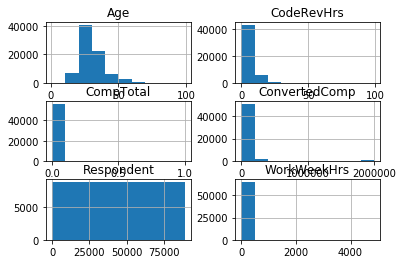

In [84]:
survey_df.hist();

One can see that the age, hours spend on code revies (CodeRevHrs) and the Salary (CompTotal, ConvertedCommp) are right-skweded

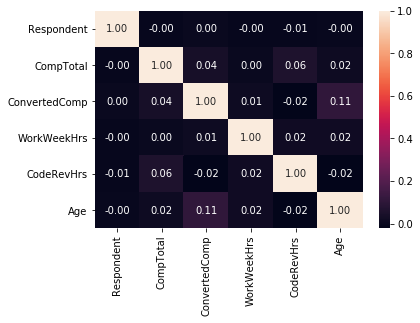

In [87]:
# creating a heatmap to see correlations between the quantitative variables
sns.heatmap(survey_df.corr(), annot=True, fmt=".2f");

We can see the highest positive correlation between the compensations (Salary) and the Age, while the hours worked per week just seem to have weak correlation with the Salary

#### What are the factors that influence Job and career satisfaction the most (CareerSat & JobSat)?

In [95]:
#lets have a look at the two variables CareerSat & JobSat
job_sat = survey_df.CareerSat.value_counts()
carrer_sat = survey_df.CareerSat.value_counts()

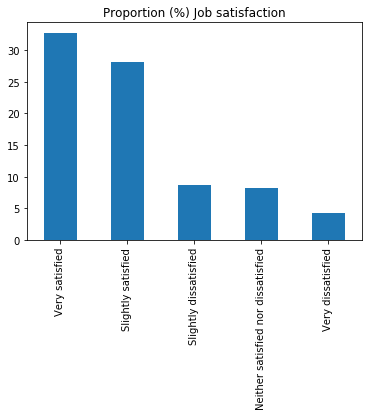

In [111]:
#bar chart of the proportion of individuals in each category (from very satisfied to very dissatisfied) 
(job_sat/survey_df.shape[0]*100).plot(kind='bar')
plt.title('Proportion (%) Job satisfaction');

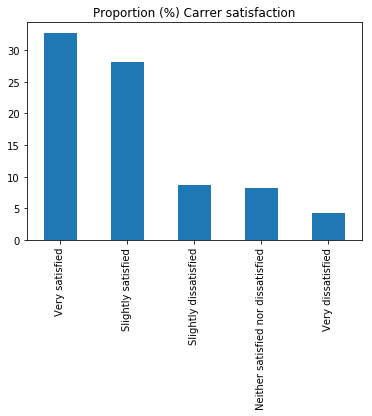

In [112]:
#bar chart of the proportion of individuals in each category (from very satisfied to very dissatisfied) 
(carrer_sat/survey_df.shape[0]*100).plot(kind='bar')
plt.title('Proportion (%) Carrer satisfaction');

From the first overview we can see that we are dealing with a fairly high amount of missing values. So lets have a closer look the missing values

In [88]:
# set of columns that doesnt have missing values
no_missing_values = set(survey_df.columns[survey_df.isnull().mean()==0])
print('Just the following columns have no missing values: {}'.format(no_missing_values))

Just the following columns have no missing values: {'Hobbyist', 'OpenSourcer', 'Respondent'}


In [89]:
# lets have look at which coloums have the highest amount of missing data
survey_df.isnull().mean().sort_values(ascending=False)[:30]

BlockchainOrg             0.457995
CodeRevHrs                0.439825
ConvertedComp             0.371950
CompTotal                 0.370577
MiscTechWorkedWith        0.329613
BlockchainIs              0.323099
PurchaseHow               0.312489
MgrMoney                  0.311938
MgrIdiot                  0.311916
MgrWant                   0.311094
PurchaseWhat              0.302128
UnitTests                 0.294938
WebFrameDesireNextYear    0.291833
CompFreq                  0.288188
WorkWeekHrs               0.274293
MiscTechDesireNextYear    0.274203
WebFrameWorkedWith        0.268454
LastInt                   0.244456
WorkChallenge             0.233363
SOHowMuchTime             0.230697
WorkPlan                  0.224666
DatabaseDesireNextYear    0.222045
SONewContent              0.217398
WorkLoc                   0.211829
WorkRemote                0.209253
CodeRev                   0.208060
JobSat                    0.201332
FizzBuzz                  0.197327
CurrencyDesc        

In [90]:
# lets have a look at the columns that have more than 20% missing values
over_20 = (survey_df.columns[survey_df.isnull().mean() > .2]).value_counts().sum()
print('{} % of the columns ({} columns) have more than 20% missing values'.format(((over_20/survey_df.shape[1]* 100)).round(2), over_20))

31.76 % of the columns (27 columns) have more than 20% missing values


### 3. Prepare Data

### 4. Data Modeling

### 5. Evaluate the Results

### 6. Deploy